### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import os
from dotenv import load_dotenv

In [2]:
## Importando variáveis
load_dotenv()

connUrl = URL.create(
    "mssql+pyodbc",
    host = os.environ.get('DB_HOST'),
    database = os.environ.get('DATABASE'),
    username = os.environ.get('DB_USR'),
    password = os.environ.get('DB_PASS'),
    query = {
        "driver": "ODBC Driver 18 for SQL Server",
        "TrustServerCertificate": "yes"      
    }
)

engine = create_engine(connUrl)

In [3]:
maquinas = pd.read_sql(
    """
    SELECT
         maquina,
         LEFT(rdt,10) AS data,
         eixo,
         torque,
         temperatura,
         vibracao,
         pressao
        FROM maquinas
    """,
    engine
)

In [4]:
maquinas

,maquina,data,eixo,torque,temperatura,vibracao,pressao
0,M00432,2023-07-21,B,5.341228,30.182116,1.542653,64.395782
1,M00432,2023-07-21,Magazine,5.182581,35.393272,1.585898,64.310059
2,M00432,2023-07-21,Spindle,7.537789,102.291122,2.121372,64.270447
3,M00432,2023-07-21,X,3.054814,38.037018,1.025554,64.527374
4,M00432,2023-07-21,Y,13.675704,54.596870,3.690912,65.013481
...,...,...,...,...,...,...,...
43520,M00857,2025-08-23,Magazine,2.967329,31.757671,0.945073,64.929832
43521,M00857,2025-08-23,Spindle,28.196190,69.601982,7.269633,64.513687
43522,M00857,2025-08-23,X,3.879549,39.021786,1.179754,64.789650
43523,M00857,2025-08-23,Y,12.920068,46.100098,3.471313,65.922844


In [5]:
maquinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43525 entries, 0 to 43524
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maquina      43525 non-null  object 
 1   data         43525 non-null  object 
 2   eixo         43525 non-null  object 
 3   torque       43525 non-null  float64
 4   temperatura  43525 non-null  float64
 5   vibracao     43525 non-null  float64
 6   pressao      43525 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.3+ MB


### Analise unidimensional das variáveis

In [6]:
## Frequência de máquinas

maquinas.maquina.value_counts()

maquina
M00452    2977
M00451    2976
M00444    2975
M00442    2974
M00443    2974
M00433    2974
M00453    2971
M00432    2969
M00456    2961
M00434    2838
M00851    1745
M00836    1737
M00857    1728
M00856    1591
M00837    1416
M00838    1416
M00839    1396
M00854     997
M00853     992
M00840     918
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


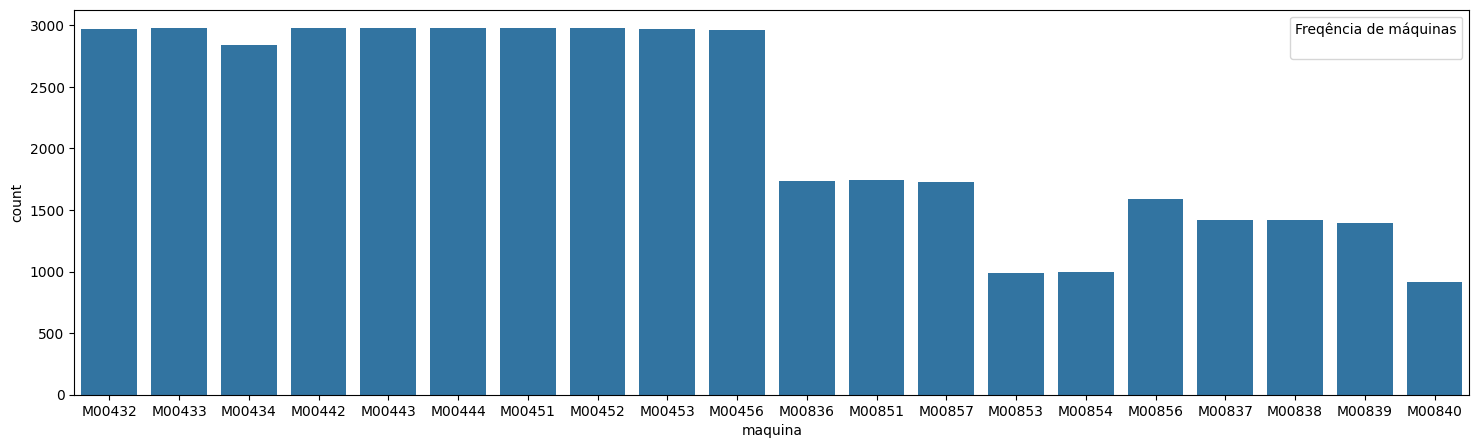

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))
sns.countplot(x='maquina', data=maquinas)
plt.legend(title='Freqência de máquinas', labelspacing=1.2)
plt.show()

In [8]:
### Analise de torque

maquinas.groupby('maquina')['torque'].mean()

maquina
M00432     6.683551
M00433     8.395923
M00434     7.549581
M00442     8.183223
M00443     6.150082
M00444     8.021276
M00451     8.589774
M00452     6.695854
M00453     6.651714
M00456     5.626422
M00836     7.198109
M00837     8.484029
M00838     7.400637
M00839     8.874722
M00840     6.580680
M00851     8.655651
M00853    10.518926
M00854     9.464075
M00856     8.385562
M00857    10.033575
Name: torque, dtype: float64

In [9]:
maquinas.torque.value_counts().sort_index

<bound method Series.sort_index of torque
3.510753     2
4.629749     2
12.722378    2
3.403856     2
2.531070     2
            ..
10.489873    1
9.750195     1
2.497493     1
14.707173    1
5.570493     1
Name: count, Length: 43446, dtype: int64>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


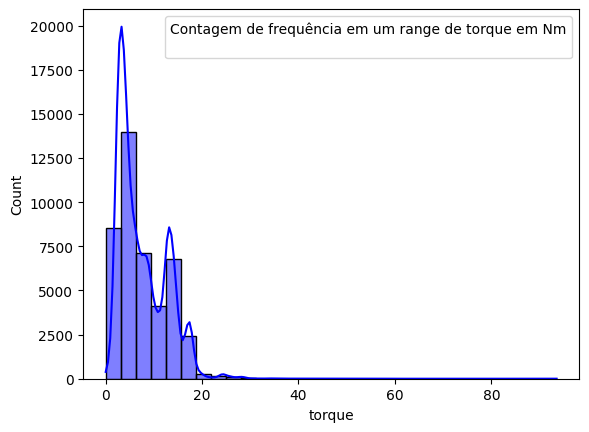

In [10]:
sns.histplot(maquinas, x='torque', bins=30, color='blue', kde=True, stat='count')
plt.legend(title='Contagem de frequência em um range de torque em Nm', labelspacing=1.2)
plt.show()

In [11]:
## Análise de vibração

maquinas.vibracao.value_counts().sort_index

<bound method Series.sort_index of vibracao
1.169198    3
1.532639    3
0.917297    3
3.523357    2
1.259648    2
           ..
4.550004    1
2.328022    1
1.185047    1
0.758171    1
1.531150    1
Name: count, Length: 43212, dtype: int64>

In [12]:
maquinas.groupby('maquina')['vibracao'].mean().sort_index

<bound method Series.sort_index of maquina
M00432    1.869643
M00433    2.298899
M00434    2.095339
M00442    2.262963
M00443    1.785136
M00444    2.215589
M00451    2.325151
M00452    1.873019
M00453    1.855511
M00456    1.616935
M00836    1.990569
M00837    2.279335
M00838    2.071064
M00839    2.400681
M00840    1.892981
M00851    2.370765
M00853    2.769982
M00854    2.528820
M00856    2.289353
M00857    2.694607
Name: vibracao, dtype: float64>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


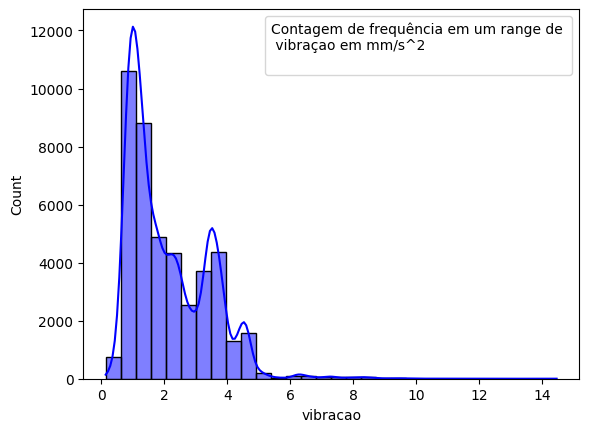

In [13]:
sns.histplot(maquinas, x='vibracao', bins=30, color='blue', kde=True, stat='count')
plt.legend(title='Contagem de frequência em um range de \n vibraçao em mm/s^2', labelspacing=1.2)
plt.show()

In [14]:
## Analise de temperatura

maquinas.temperatura.value_counts().sort_index

<bound method Series.sort_index of temperatura
0.000000     155
32.000000      9
29.000000      9
34.000000      8
25.000000      8
            ... 
47.991562      1
35.857372      1
52.311649      1
36.034561      1
43.797153      1
Name: count, Length: 43124, dtype: int64>

In [15]:
maquinas.groupby('maquina')['temperatura'].mean()

maquina
M00432    46.324636
M00433    44.755065
M00434    42.417560
M00442    41.166014
M00443    41.813624
M00444    43.162747
M00451    39.637367
M00452    41.207181
M00453    39.733154
M00456    40.744339
M00836    47.010303
M00837    46.052412
M00838    44.066734
M00839    47.336365
M00840    47.038071
M00851    49.628308
M00853    49.278134
M00854    52.734163
M00856    46.920907
M00857    51.661250
Name: temperatura, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


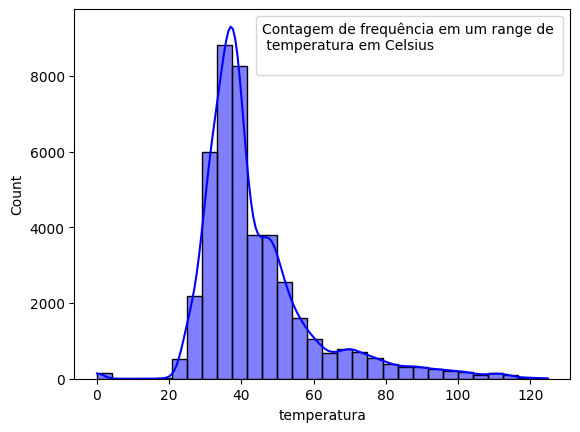

In [16]:
sns.histplot(maquinas, x='temperatura', bins=30, color='blue', kde=True, stat='count')
plt.legend(title='Contagem de frequência em um range de \n temperatura em Celsius', labelspacing=1.2)
plt.show()

In [17]:
### Análise da pressão do líquido de corte e arrefecimento

maquinas.pressao.value_counts().sort_index

<bound method Series.sort_index of pressao
64.978142    4
65.108315    4
65.300217    4
64.602715    4
64.780647    4
            ..
65.180878    1
65.435013    1
65.277184    1
64.861313    1
64.678246    1
Name: count, Length: 39807, dtype: int64>

In [18]:
maquinas.groupby('maquina')['pressao'].mean().sort_index

<bound method Series.sort_index of maquina
M00432    64.635140
M00433    64.751479
M00434    64.316461
M00442    64.594843
M00443    64.486677
M00444    64.808084
M00451    64.928235
M00452    64.553223
M00453    64.542459
M00456    64.674197
M00836    64.682856
M00837    64.284245
M00838    64.868129
M00839    63.940940
M00840    64.248917
M00851    63.814426
M00853    62.869569
M00854    63.534929
M00856    63.859383
M00857    64.100625
Name: pressao, dtype: float64>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


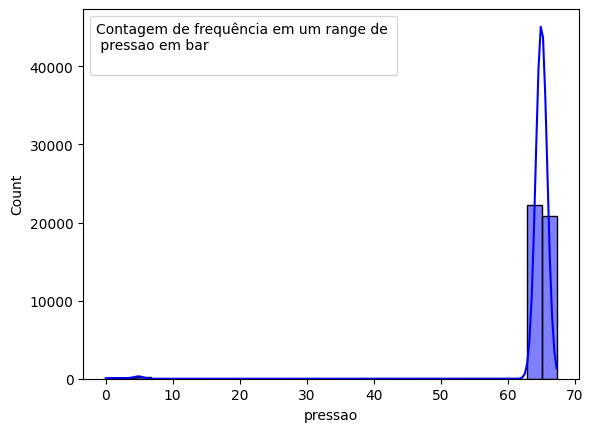

In [19]:
sns.histplot(maquinas, x='pressao', bins=30, color='blue', kde=True, stat='count')
plt.legend(title='Contagem de frequência em um range de \n pressao em bar', labelspacing=1.2)
plt.show()

In [20]:
### Resumo geral das variáveis

maquinas.drop(columns=['maquina', 'data','eixo']).describe()

,torque,temperatura,vibracao,pressao
count,43525.000000,43525.000000,43525.000000,43525.000000
mean,7.667501,44.021781,2.117692,64.451735
std,5.193950,15.874383,1.279532,5.806705
min,0.035858,0.000000,0.140439,0.027149
25%,3.510806,34.445023,1.075409,64.652298
50%,6.040332,39.136513,1.708034,64.996056
75%,11.843376,48.905586,3.165191,65.333221
max,93.507751,124.907913,14.451904,67.262680


### Analise de correlação das variáveis

In [21]:
colunas_corr = maquinas[['torque', 'temperatura', 'vibracao', 'pressao']]
colunas_corr

,torque,temperatura,vibracao,pressao
0,5.341228,30.182116,1.542653,64.395782
1,5.182581,35.393272,1.585898,64.310059
2,7.537789,102.291122,2.121372,64.270447
3,3.054814,38.037018,1.025554,64.527374
4,13.675704,54.596870,3.690912,65.013481
...,...,...,...,...
43520,2.967329,31.757671,0.945073,64.929832
43521,28.196190,69.601982,7.269633,64.513687
43522,3.879549,39.021786,1.179754,64.789650
43523,12.920068,46.100098,3.471313,65.922844


In [22]:
matriz_corr = colunas_corr.corr()
print(matriz_corr)

               torque  temperatura  vibracao   pressao
torque       1.000000     0.307213  0.919573  0.064669
temperatura  0.307213     1.000000  0.305927  0.015313
vibracao     0.919573     0.305927  1.000000  0.064097
pressao      0.064669     0.015313  0.064097  1.000000


### Análise de outliers com o boxplot

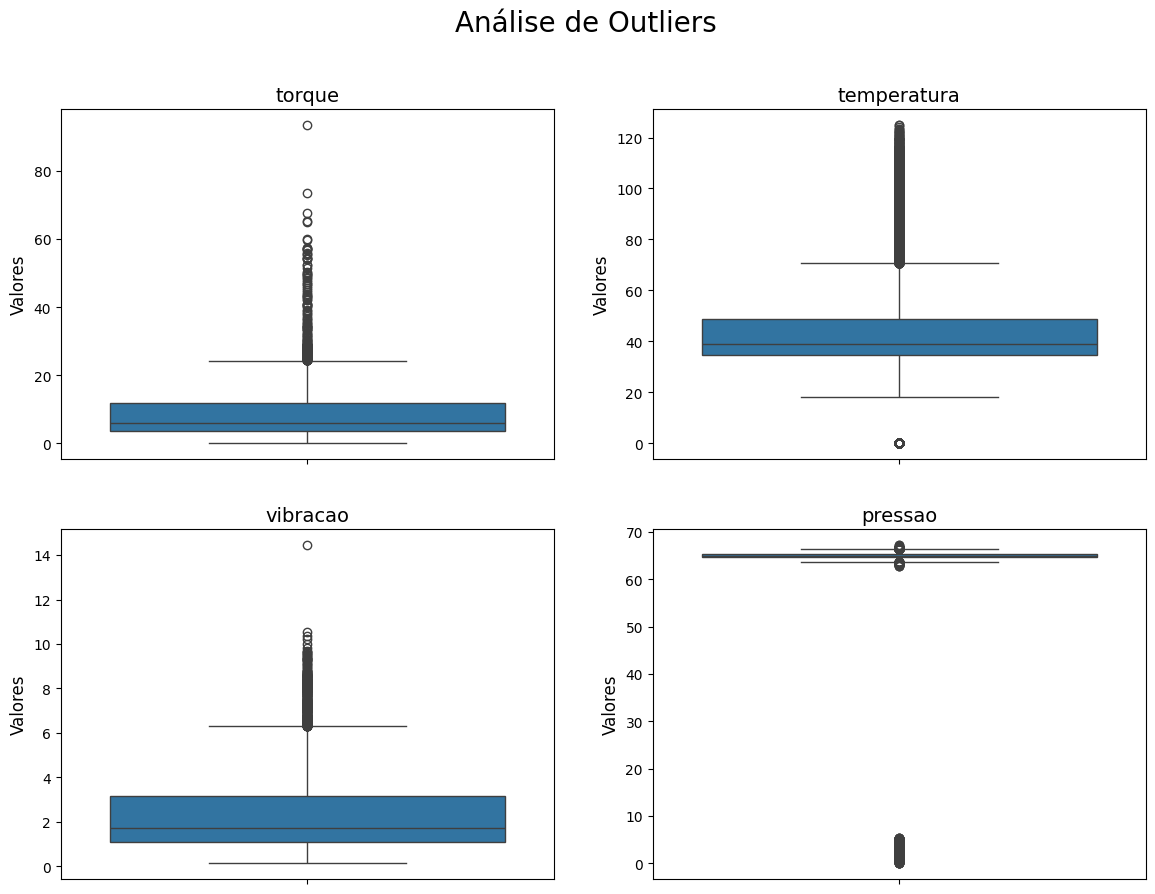

In [23]:
variaveis = ['torque', 'temperatura', 'vibracao', 'pressao']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes = axes.flatten()

fig.suptitle('Análise de Outliers', fontsize=20)

for i, coluna in enumerate(variaveis):
    sns.boxplot(y=colunas_corr[coluna], ax=axes[i], orient='v')
    axes[i].set_title(f'{coluna}', fontsize=14)
    axes[i].set_ylabel('Valores', fontsize=12)
    axes[i].set_xlabel('')

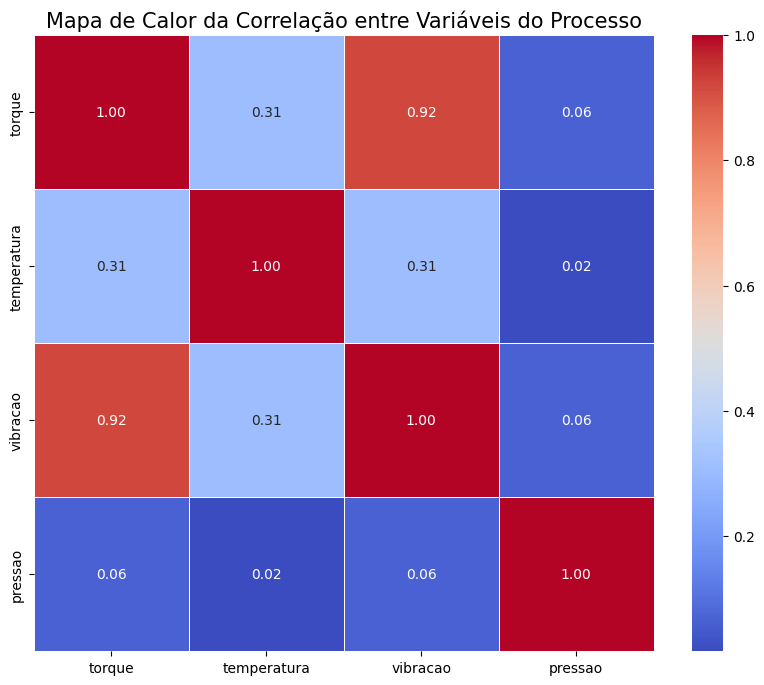

In [24]:
### Exibição gráfica do resultado da matriz em heatmap

plt.figure(figsize=(10,8))
sns.heatmap(
    matriz_corr,
    annot=True,       
    cmap='coolwarm',  
    fmt=".2f",        
    linewidths=.5
)
plt.title('Mapa de Calor da Correlação entre Variáveis do Processo', fontsize=15)
plt.show()

Aqui nós observamos uma forte relação entre torque e vibração. Oque faz total sentido.
Validaremos sua relação, graficamente, em um scatterplot.

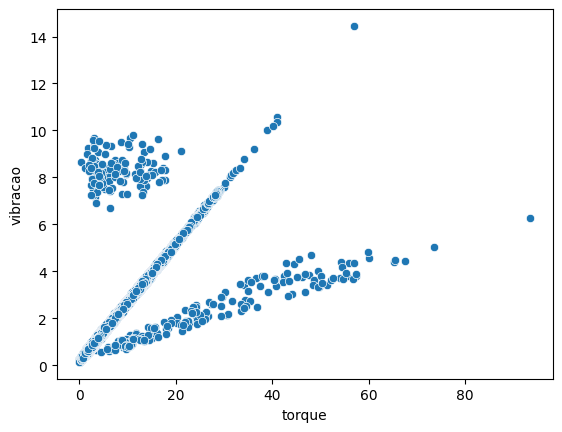

In [32]:
ax = sns.scatterplot(data=maquinas, x='torque', y='vibracao')


Além da correlação positiva entre torque e vibração.

É possível observar uma grande anomalia entre a faixa 0-20 de torque, bem como um ponto disperso alto do esforço da máquina de +80.

E uma vibração desproporcional a partir de "40nm"m em que o equipamento se torna mais instável a partir dessa faixa.